In [102]:
import cv2
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline 

import os
import random
import gc   #Gabage collector for cleaning deleted data from memory


In [103]:
train_dir_bad = 'images/train/bad'
train_dir_good = 'images/train/good'
#test_dir = 'images/test/'
test_dir_bad = 'images/test/bad'
test_dir_good = 'images/test/good'

train_bad = ['images/train/bad/{}'.format(i) for i in os.listdir(train_dir_bad) ]  #get bad images
train_good = ['images/train/good/{}'.format(i) for i in os.listdir(train_dir_good) ]  #get good images

#est_imgs = ['images/test/{}'.format(i) for i in os.listdir(test_dir)] #get test images
test_bad = ['images/test/bad/{}'.format(i) for i in os.listdir(test_dir_bad) ]  #get bad images
test_good = ['images/test/good/{}'.format(i) for i in os.listdir(test_dir_good) ]  #get good images

train_imgs = train_bad[:40] + train_good[:40] 
test_imgs = test_bad[:10] + test_good[:10] 
random.shuffle(train_imgs)  # shuffle it randomly
#print(train_imgs)
#print(train_bad)
#print(train_bad[0:3])
#print(train_imgs[0:3])
#type(train_imgs)
#len(train_imgs)
#print(test_bad)
#print(test_good)
print(test_imgs)

['images/test/bad/FrEvMumWYAM1YLU.jpg', 'images/test/bad/FrJ0X2kXgAAq1bw.jpg', 'images/test/bad/Froo9L-WcAAhOxw.jpg', 'images/test/bad/FrR12QmWAAA7sbz.png', 'images/test/bad/FrWRpgzaIAM2gnE.jpg', 'images/test/bad/FwGSoy-XwAI49NT.jpg', 'images/test/bad/FxaMyzbWAAIRWvW.jpg', 'images/test/bad/FxaMyzYXwAIOaKN.jpg', 'images/test/bad/FYhV1NcWQAEWLx8.jpg', 'images/test/bad/FYmb5vOWAAYvAST.jpg', 'images/test/good/FsuATk6WcAA4EIV.jpg', 'images/test/good/FsuAVuLWwAUIzyo.jpg', 'images/test/good/FsUCIBMWwAA7SqM.jpg', 'images/test/good/FtHaonAWYAEJL1x.jpg', 'images/test/good/Fti8PTQWwAEnCCR.png', 'images/test/good/Fvskrh0X0AAKHYQ.jpg', 'images/test/good/FvXlvYXXwAMXPhh.jpg', 'images/test/good/FwLElmEXoAM7i1J.jpg', 'images/test/good/FwLWmB9WIAIIm-9.jpg', 'images/test/good/FwLWmBlX0AE90BS.jpg']


In [104]:
path = 'images/train/good'
dir_list = os.listdir(path)
for i in os.listdir(path):
    print(i)
#train_imgs = train_bad[:40]
#print(train_imgs)
  
print("Files and directories in '", path, "' :") 
  
# print the list
#print(path)


Fa24SXuWIAAX177.jpg
Fa2tJzNWYAEwbuf.jpg
FaIVKkDWYAIEWI1.jpg
FaIVKoMWYAAi8Ru.jpg
Faxx-zLWAAEI3OA.jpg
FbaQyfCWYAIvrdK.jpg
FbaQyfEXEAEe3gv.jpg
FbVJI5FXkAEApHW.jpg
FbvUEyOXEAAWv1k.jpg
Fc3XjT6XgAIbB_J.jpg
Fc8d0kQXEAIvFwY (1).jpg
Fc8d0kQXEAIvFwY.jpg
Fc8IUAEXoAIPygv.jpg
FcnuXa9XkAAlsPo.jpg
FcoDzByXkAAwUUP.jpg
FcTWpFyWQAM_2p-.jpg
Fd7DZXRWIAA9iXc.jpg
Fdl5dn9XEAEmkNv.jpg
Fdlknj0WYAEdZyf.jpg
FdlPnVKXEAc38we.jpg
FdLyCHQWAAAkdkO.jpg
FeE1TneXkAA83IC.jpg
FeeZO3TWQAgkX72.jpg
FeeZRRDXgAAwnRt.jpg
FeKmOQgXkAsSLlP.png
FePB2sIWAAIOZAX.jpg
FeY4TZ5XwAARqtI.jpg
Ff7DX-GXgAc2VDb.jpg
FfM2pmNXgAQxsZw.jpg
Fgke1s5X0AIT6Re.jpg
FgKVXU0XEAIAppZ.jpg
Fh2rGAtXkAE7AxJ.jpg
Fh7xGVXWQAA3LOf.jpg
FhDDaGtXEAASPSy.jpg
FhdMs1wWQAIyXzL.jpg
FhfpocoXoAIbuy6.jpg
FhILi5aXgAAg7QT.jpg
FiqSRIlXwAke6UP.jpg
FitEXdKXoAQv_39.jpg
FiVkAOkWIAAUbGL.jpg
FiyJ1AjX0AAXL98.jpg
Fj1B7T_WAAEqi8A.jpg
FjEFMb9X0AAOqoO.jpg
FkgwP6TXoAIBL9I.jpg
FkMELebWQAEVID8.jpg
FleiByrXwAE8ToT.jpg
FlZcpAfWIAACsff.jpg
FmcTBhkXwAIl7T8.jpg
FmfFHWjWIAAzgUK.jpg
FmhYSyKXoAA3W2f.

images/train/good/Fc3XjT6XgAIbB_J.jpg


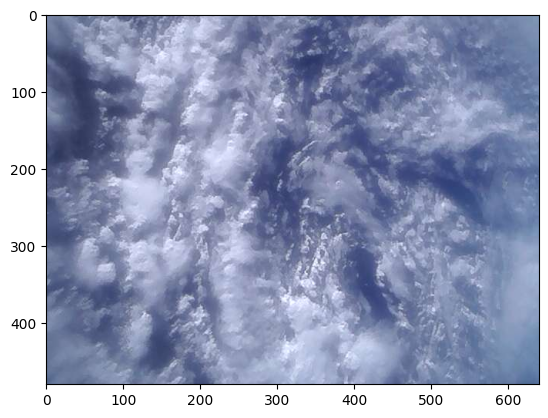

images/train/good/Fa2tJzNWYAEwbuf.jpg


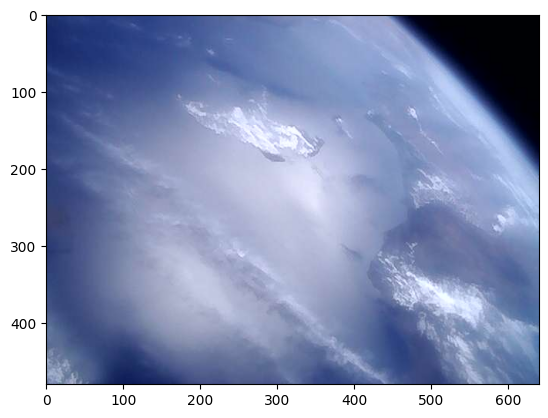

images/train/bad/FgkJfAXWIAEKXhC.jpg


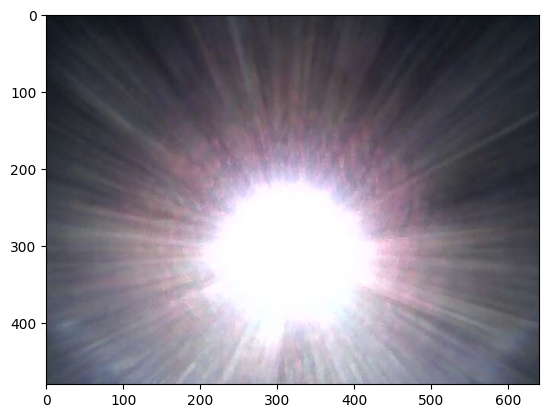

In [105]:
 import matplotlib.image as mpimg
 for ima in train_imgs[0:3]:
    print(ima)
    img=mpimg.imread(ima)
    imgplot = plt.imshow(img)
    plt.show()

In [106]:
nrows = 150
ncolumns = 150
channels = 1  #change to 1 if you want to use grayscale image


def read_and_process_image(list_of_images):
    """
    Returns two arrays: 
        X is an array of resized images
        y is an array of labels
    """
    X = [] # images
    y = [] # labels
    
    for image in list_of_images:
        X.append(cv2.resize(cv2.imread(image, cv2.IMREAD_COLOR), (nrows,ncolumns), interpolation=cv2.INTER_CUBIC))  #Read the image
        #get the labels
        if 'bad' in image:
            y.append(1)
        elif 'good' in image:
            y.append(0)
    
    return X, y

In [107]:
#get the train and label data
X, y = read_and_process_image(train_imgs)


[notice] A new release of pip is available: 23.1.2 -> 23.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Text(0.5, 1.0, 'Labels for Good and Bad')

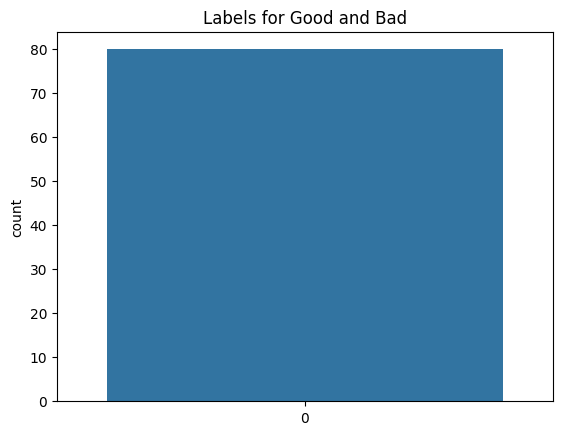

In [108]:
!pip3 install seaborn
import seaborn as sns
del train_imgs
gc.collect()

X = np.array(X)
y = np.array(y)

sns.countplot(y)
plt.title('Labels for Good and Bad')

In [109]:
print("Shape of train images is:", X.shape)
print("Shape of labels is:", y.shape)

Shape of train images is: (80, 150, 150, 3)
Shape of labels is: (80,)


In [110]:
#split the data into train and test set
!pip3 install scikit-learn
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.20, random_state=2)

print("Shape of train images is:", X_train.shape)
print("Shape of validation images is:", X_val.shape)
print("Shape of labels is:", y_train.shape)
print("Shape of labels is:", y_val.shape)

Shape of train images is: (64, 150, 150, 3)
Shape of validation images is: (16, 150, 150, 3)
Shape of labels is: (64,)
Shape of labels is: (16,)



[notice] A new release of pip is available: 23.1.2 -> 23.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [111]:
#clear memory
del X
del y
gc.collect()

#get the length of the train and validation data
ntrain = len(X_train)
nval = len(X_val)

#We will use a batch size of 32. Note: batch size should be a factor of 2.***4,8,16,32,64...***
batch_size = 10


Now lets create our model.

In [112]:
!pip3 install protobuf==3.20.*



[notice] A new release of pip is available: 23.1.2 -> 23.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [113]:
#!pip3 uninstall keras

In [114]:
!pip install tensorflow --user


[notice] A new release of pip is available: 23.1.2 -> 23.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [115]:
pip install --user --upgrade tensorflow-model-optimization

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [116]:
!pip3 install keras==2.11.0
!pip3 install tensorflow 
!pip3 install protobuf==3.20.*

from keras import layers
from keras import models
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
#from keras.preprocessing.image import img_to_array, load_img
from tensorflow.keras.utils import img_to_array, load_img

  Using cached keras-2.11.0-py2.py3-none-any.whl (1.7 MB)
  Attempting uninstall: keras
    Found existing installation: keras 2.13.1
    Uninstalling keras-2.13.1:
      Successfully uninstalled keras-2.13.1


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-intel 2.13.0 requires keras<2.14,>=2.13.1, but you have keras 2.11.0 which is incompatible.

[notice] A new release of pip is available: 23.1.2 -> 23.2
[notice] To update, run: python.exe -m pip install --upgrade pip


  Using cached keras-2.13.1-py3-none-any.whl (1.7 MB)
  Attempting uninstall: keras
    Found existing installation: keras 2.11.0
    Uninstalling keras-2.11.0:
      Successfully uninstalled keras-2.11.0



[notice] A new release of pip is available: 23.1.2 -> 23.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.1.2 -> 23.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [117]:
import tensorflow_model_optimization as tfmot


In [118]:
from tensorflow_model_optimization.sparsity import keras as sparsity

In [119]:
pruning_params = {'pruning_schedule': sparsity.PolynomialDecay(initial_sparsity=0.85,

final_sparsity=0.95,

begin_step=100,

end_step=5000,frequency=100)}

pruned_model = models.Sequential([

sparsity.prune_low_magnitude(layers.Conv2D(filters=1, kernel_size=3), input_shape=[150, 150, 3],**pruning_params),

layers.MaxPooling2D(pool_size=(2,2)),

sparsity.prune_low_magnitude (layers.Conv2D(filters=2, kernel_size=3),**pruning_params),

layers.MaxPooling2D(pool_size=(2,2)),

sparsity.prune_low_magnitude (layers.Conv2D(filters=4, kernel_size=3),**pruning_params),

layers.MaxPooling2D(pool_size=(2,2)),

sparsity.prune_low_magnitude(layers.Conv2D(filters=4, kernel_size=3),**pruning_params),

layers.MaxPooling2D(pool_size=(2,2)),
    
sparsity.prune_low_magnitude(layers.Conv2D(filters=4, kernel_size=3),**pruning_params),

layers.MaxPooling2D(pool_size=(2,2)),

layers.Dropout(0.5),

layers.Flatten(), # neural network beulding

sparsity.prune_low_magnitude (layers.Dense(units=128, activation='relu'),**pruning_params), # input layers

layers.Dropout(0.1),

sparsity.prune_low_magnitude (layers.Dense(units=256, activation='relu'),**pruning_params),

layers.Dropout(0.25),

sparsity.prune_low_magnitude(layers.Dense(units=1, activation='softmax'),**pruning_params) # output layer

])



In [120]:
pruned_model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 prune_low_magnitude_conv2d  (None, 148, 148, 1)       57        
 _59 (PruneLowMagnitude)                                         
                                                                 
 max_pooling2d_58 (MaxPooli  (None, 74, 74, 1)         0         
 ng2D)                                                           
                                                                 
 prune_low_magnitude_conv2d  (None, 72, 72, 2)         40        
 _60 (PruneLowMagnitude)                                         
                                                                 
 max_pooling2d_59 (MaxPooli  (None, 36, 36, 2)         0         
 ng2D)                                                           
                                                                 
 prune_low_magnitude_conv2d  (None, 34, 34, 4)       

In [105]:
!pip3 install keras==2.11.0
!pip3 install tensorflow 
!pip3 install protobuf==3.20.*

from keras import layers
from keras import models
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
#from keras.preprocessing.image import img_to_array, load_img
from tensorflow.keras.utils import img_to_array, load_img

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))  #Dropout for regularization
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))  #Sigmoid function at the end because we have just two classes

  Using cached keras-2.11.0-py2.py3-none-any.whl (1.7 MB)
  Attempting uninstall: keras
    Found existing installation: keras 2.13.1
    Uninstalling keras-2.13.1:
      Successfully uninstalled keras-2.13.1


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-intel 2.13.0 requires keras<2.14,>=2.13.1, but you have keras 2.11.0 which is incompatible.


  Using cached keras-2.13.1-py3-none-any.whl (1.7 MB)
  Attempting uninstall: keras
    Found existing installation: keras 2.11.0
    Uninstalling keras-2.11.0:
      Successfully uninstalled keras-2.11.0


In [106]:
#Lets see our model
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 74, 74, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_11 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 36, 36, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_12 (Conv2D)          (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 17, 17, 128)      

In [107]:
pip install --user --upgrade tensorflow-model-optimization

Note: you may need to restart the kernel to use updated packages.


In [108]:
import tensorflow as tf

In [109]:
import tensorflow_model_optimization as tfmot

quantize_model = tfmot.quantization.keras.quantize_model

# q_aware stands for quantization aware.
q_aware_model = quantize_model(model)

# `quantize model` requires a recompile.
q_aware_model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [110]:
print(q_aware_model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 quantize_layer_3 (Quantize  (None, 150, 150, 3)       3         
 Layer)                                                          
                                                                 
 quant_conv2d_10 (QuantizeW  (None, 148, 148, 32)      963       
 rapperV2)                                                       
                                                                 
 quant_max_pooling2d_10 (Qu  (None, 74, 74, 32)        1         
 antizeWrapperV2)                                                
                                                                 
 quant_conv2d_11 (QuantizeW  (None, 72, 72, 64)        18627     
 rapperV2)                                                       
                                                                 
 quant_max_pooling2d_11 (Qu  (None, 36, 36, 64)       

In [121]:
#We'll use the RMSprop optimizer with a learning rate of 0.0001
#We'll use binary_crossentropy loss because its a binary classification
pruned_model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(learning_rate=1e-4), metrics=['acc'])

In [122]:
#Lets create the augmentation configuration
#This helps prevent overfitting, since we are using a small dataset
train_datagen = ImageDataGenerator(rescale=1./255,   #Scale the image between 0 and 1
                                    rotation_range=40,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True,)

val_datagen = ImageDataGenerator(rescale=1./255)  #We do not augment validation data. we only perform rescale

In [123]:
#Create the image generators
train_generator = train_datagen.flow(X_train, y_train, batch_size=batch_size)
val_generator = val_datagen.flow(X_val, y_val, batch_size=batch_size)

In [127]:
callbacks = [sparsity.UpdatePruningStep(),sparsity.PruningSummaries(log_dir=train_dir_bad, profile_batch=0)]

history_prun=pruned_model.fit(train_generator,epochs=10,verbose=1,

validation_data= val_generator,callbacks=callbacks)

Epoch 1/10
6/7 [========================>.....] - ETA: 0s - loss: 0.6971 - acc: 0.5370WARNING:tensorflow:Callback method `on_train_batch_end` is slow compared to the batch time (batch time: 0.0235s vs `on_train_batch_end` time: 0.0719s). Check your callbacks.


7/7 [==============================] - 1s 78ms/step - loss: 0.6963 - acc: 0.5000 - val_loss: 0.6956 - val_acc: 0.5000
Epoch 2/10
7/7 [==============================] - 0s 40ms/step - loss: 0.6951 - acc: 0.5000 - val_loss: 0.6953 - val_acc: 0.5000
Epoch 3/10
7/7 [==============================] - 0s 45ms/step - loss: 0.6895 - acc: 0.5000 - val_loss: 0.6952 - val_acc: 0.5000
Epoch 4/10
7/7 [==============================] - 0s 39ms/step - loss: 0.6906 - acc: 0.5000 - val_loss: 0.6948 - val_acc: 0.5000
Epoch 5/10
7/7 [==============================] - 0s 40ms/step - loss: 0.6916 - acc: 0.5000 - val_loss: 0.6944 - val_acc: 0.5000
Epoch 6/10
7/7 [==============================] - 0s 43ms/step - loss: 0.6877 - acc: 0.5000 - val_loss: 0.6943 - val_acc: 0.5000
Epoch 7/10
7/7 [==============================] - 0s 41ms/step - loss: 0.6918 - acc: 0.5000 - val_loss: 0.6940 - val_acc: 0.5000
Epoch 8/10
7/7 [==============================] - 0s 42ms/step - loss: 0.6964 - acc: 0.5000 - val_loss: 0.69

In [124]:
#The training part
#We train for 64 epochs with about 100 steps per epoch
history = pruned_model.fit(train_generator,
                              steps_per_epoch=ntrain // batch_size,
                              epochs=32,
                              validation_data=val_generator,
                              validation_steps=nval // batch_size)

Epoch 1/32


InvalidArgumentError: Graph execution error:

Detected at node 'sequential_15/prune_low_magnitude_conv2d_59/assert_greater_equal/Assert/AssertGuard/Assert' defined at (most recent call last):
    File "<frozen runpy>", line 198, in _run_module_as_main
    File "<frozen runpy>", line 88, in _run_code
    File "C:\Users\ritis\AppData\Local\Programs\Python\Python311\Lib\site-packages\ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "C:\Users\ritis\AppData\Local\Programs\Python\Python311\Lib\site-packages\traitlets\config\application.py", line 1043, in launch_instance
      app.start()
    File "C:\Users\ritis\AppData\Local\Programs\Python\Python311\Lib\site-packages\ipykernel\kernelapp.py", line 728, in start
      self.io_loop.start()
    File "C:\Users\ritis\AppData\Local\Programs\Python\Python311\Lib\site-packages\tornado\platform\asyncio.py", line 195, in start
      self.asyncio_loop.run_forever()
    File "C:\Users\ritis\AppData\Local\Programs\Python\Python311\Lib\asyncio\base_events.py", line 607, in run_forever
      self._run_once()
    File "C:\Users\ritis\AppData\Local\Programs\Python\Python311\Lib\asyncio\base_events.py", line 1922, in _run_once
      handle._run()
    File "C:\Users\ritis\AppData\Local\Programs\Python\Python311\Lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "C:\Users\ritis\AppData\Local\Programs\Python\Python311\Lib\site-packages\ipykernel\kernelbase.py", line 516, in dispatch_queue
      await self.process_one()
    File "C:\Users\ritis\AppData\Local\Programs\Python\Python311\Lib\site-packages\ipykernel\kernelbase.py", line 505, in process_one
      await dispatch(*args)
    File "C:\Users\ritis\AppData\Local\Programs\Python\Python311\Lib\site-packages\ipykernel\kernelbase.py", line 412, in dispatch_shell
      await result
    File "C:\Users\ritis\AppData\Local\Programs\Python\Python311\Lib\site-packages\ipykernel\kernelbase.py", line 740, in execute_request
      reply_content = await reply_content
    File "C:\Users\ritis\AppData\Local\Programs\Python\Python311\Lib\site-packages\ipykernel\ipkernel.py", line 422, in do_execute
      res = shell.run_cell(
    File "C:\Users\ritis\AppData\Local\Programs\Python\Python311\Lib\site-packages\ipykernel\zmqshell.py", line 540, in run_cell
      return super().run_cell(*args, **kwargs)
    File "C:\Users\ritis\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\interactiveshell.py", line 3009, in run_cell
      result = self._run_cell(
    File "C:\Users\ritis\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\interactiveshell.py", line 3064, in _run_cell
      result = runner(coro)
    File "C:\Users\ritis\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "C:\Users\ritis\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\interactiveshell.py", line 3269, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "C:\Users\ritis\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\interactiveshell.py", line 3448, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "C:\Users\ritis\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\interactiveshell.py", line 3508, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\ritis\AppData\Local\Temp\ipykernel_21896\4106320070.py", line 3, in <module>
      history = pruned_model.fit(train_generator,
    File "C:\Users\ritis\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\ritis\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 1742, in fit
      tmp_logs = self.train_function(iterator)
    File "C:\Users\ritis\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 1338, in train_function
      return step_function(self, iterator)
    File "C:\Users\ritis\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 1322, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\ritis\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 1303, in run_step
      outputs = model.train_step(data)
    File "C:\Users\ritis\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 1080, in train_step
      y_pred = self(x, training=True)
    File "C:\Users\ritis\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\ritis\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 569, in __call__
      return super().__call__(*args, **kwargs)
    File "C:\Users\ritis\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\ritis\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\base_layer.py", line 1150, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "C:\Users\ritis\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\ritis\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\sequential.py", line 405, in call
      return super().call(inputs, training=training, mask=mask)
    File "C:\Users\ritis\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\functional.py", line 512, in call
      return self._run_internal_graph(inputs, training=training, mask=mask)
    File "C:\Users\ritis\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\functional.py", line 669, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "C:\Users\ritis\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\ritis\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\base_layer.py", line 1150, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "C:\Users\ritis\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\ritis\AppData\Roaming\Python\Python311\site-packages\tensorflow_model_optimization\python\core\sparsity\keras\pruning_wrapper.py", line 303, in call
      update_mask = utils.smart_cond(training, add_update, no_op)
    File "C:\Users\ritis\AppData\Roaming\Python\Python311\site-packages\tensorflow_model_optimization\python\core\keras\utils.py", line 51, in smart_cond
      if isinstance(pred, variables.Variable):
    File "C:\Users\ritis\AppData\Roaming\Python\Python311\site-packages\tensorflow_model_optimization\python\core\keras\utils.py", line 55, in smart_cond
      pred, true_fn=true_fn, false_fn=false_fn, name=name)
    File "C:\Users\ritis\AppData\Roaming\Python\Python311\site-packages\tensorflow_model_optimization\python\core\sparsity\keras\pruning_wrapper.py", line 285, in add_update
      with tf.control_dependencies([
Node: 'sequential_15/prune_low_magnitude_conv2d_59/assert_greater_equal/Assert/AssertGuard/Assert'
assertion failed: [Prune() wrapper requires the UpdatePruningStep callback to be provided during training. Please add it as a callback to your model.fit call.] [Condition x >= y did not hold element-wise:] [x (sequential_15/prune_low_magnitude_conv2d_59/assert_greater_equal/ReadVariableOp:0) = ] [0] [y (sequential_15/prune_low_magnitude_conv2d_59/assert_greater_equal/y:0) = ] [1]
	 [[{{node sequential_15/prune_low_magnitude_conv2d_59/assert_greater_equal/Assert/AssertGuard/Assert}}]] [Op:__inference_train_function_27832]

In [128]:
#Save the model
pruned_model.save_weights('pruned_model_wieghts.h5')
pruned_model.save('pruned_model_keras_maxpool_no_opt.h5' , include_optimizer=False)


C:\Users\ritis\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [122]:
converter = tf.lite.TFLiteConverter.from_keras_model(q_aware_model) # Define Converter
#converter.optimizations = [tf.lite.Optimize.DEFAULT] # Activate quantization
tflite_quant_model = converter.convert()
with open('model.tflite', 'wb') as f:
  f.write(q_aware_model)

AttributeError: 'str' object has no attribute 'call'

In [117]:
tflite_file ='q_aware.tflite'
#tflite_file.write_bytes(tflite_quant_model)
with open(tflite_file, 'w', encoding='utf-8') as file_obj :
  file_obj.write_bytes(tflite_quant_model)

AttributeError: '_io.TextIOWrapper' object has no attribute 'write_bytes'

In [123]:
q_aware_model.save_weights('q_aware_model_wieghts.h5')
q_aware_model.save('q_aware_model_keras_maxpool_no_opt.h5' , include_optimizer=False)

with tfmot.quantization.keras.quantize_scope():
  loaded_model = tf.keras.models.load_model('q_aware_model_keras_maxpool_no_opt.h5')

loaded_model.summary()

C:\Users\ritis\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 quantize_layer_3 (Quantize  (None, 150, 150, 3)       3         
 Layer)                                                          
                                                                 
 quant_conv2d_10 (QuantizeW  (None, 148, 148, 32)      963       
 rapperV2)                                                       
                                                                 
 quant_max_pooling2d_10 (Qu  (None, 74, 74, 32)        1         
 antizeWrapperV2)                                                
                                                                 
 quant_conv2d_11 (QuantizeW  (None, 72, 72, 64)        18627     
 rapperV2)                                                       
                                                                 
 quant_max_pooling2d_11 (Qu  (None, 36, 36, 64)       

In [65]:
X_test, y_test = read_and_process_image(test_imgs[0:10]) #Y_test in this case will be empty.
x = np.array(X_test)
test_datagen = ImageDataGenerator(rescale=1./255) 

In [63]:
#i = 0
columns=5
#text_labels = []
#plt.figure(figsize=(30,20))
for batch in test_datagen.flow(x, batch_size=1):
    pred = model.predict(batch)
    if pred > 0.5:
        #text_labels.append('bad')
        print('bad')
    else:
        #text_labels.append('good')
        print('good')
    #plt.subplot(5 / columns + 1, columns, i + 1)
    #plt.title('This is a ' + text_labels[i])
    #imgplot = plt.imshow(batch[0])
    #i += 1
    #if i % 10 == 0:
        break
#plt.show()

1/1 [==============================] - 0s 118ms/step
good
